In [42]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# For start we import the panda library and the matplot to create diagrams

In [43]:
x = pd.read_csv('train.csv')
# We set a variable for our train file

In [44]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
x.info()
# From the info library we can see that some age and cabin values are missing
## The cabin values are not that important for our research but the age values are, so we have to do something to fill that empty
## values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [46]:
x.isnull().sum()
# We have 177 values that need to be filled with something so we can use the age numbers

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
x["Age"] = x["Age"].fillna(x["Age"].mean())


#With that command we are filling the Nan values with the average of the rest of the age values so we have a good sample to use 
# for our diagrams

In [48]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
x["Survived"].value_counts()


# From that command we can see how many from the 891 survived and how many died

0    549
1    342
Name: Survived, dtype: int64

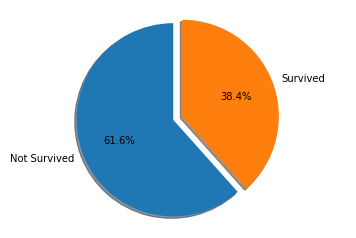

In [50]:
labels = 'Not Survived', 'Survived'
sizes = [549/891*100, 342/891*100]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [51]:
x["Sex"][x["Survived"]==1][x["Sex"] == "male"].count()


# The males survived the shipwreck where 109 from the 342

109

In [52]:
x["Sex"][x["Survived"]==1][x["Sex"] == "female"].count()


# The women survived where 2 times the number of the man survived.
## If you where a woman on the Titanic you could have more chances of surviving than a man

233

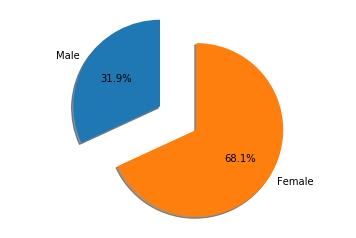

In [53]:
labels = 'Male', 'Female'
sizes = [109/342 *100, 233/342*100]
explode = (0, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


In [54]:
x["Sex"][x["Survived"]==0][x["Sex"] == "male"].count()

468

In [55]:
x["Sex"][x["Survived"]==0][x["Sex"] == "female"].count()


# Only 81 women died on that shipwreck in contrast with men that where 468 from the total number of 549

81

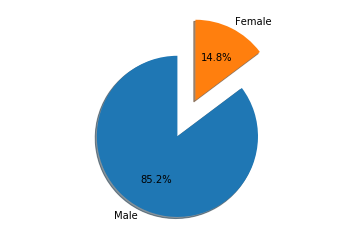

In [56]:
labels = 'Male', 'Female'
sizes = [468/549 *100, 81/549*100]
explode = (0, 0.5)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()


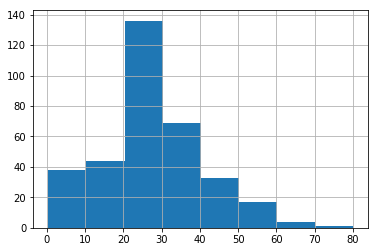

In [57]:
x["Age"][x["Survived"]==1].hist(bins = 8)

# Here we can see the age of the people surviving the shipwreck
## It is clear from diagram below that about 140 people survived where between the age of 20 and 30 which probably whre women. Something that indicates
## that if you where about that age and a woman you could have more chances for surviving than being above 50 and a man.

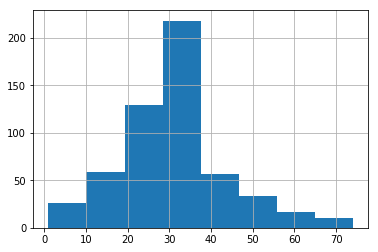

In [58]:
x["Age"][x["Survived"]==0].hist(bins = 8)


# From that diagram we can see that most of the people that didn't survive the shipwreck where about 30 years to 40 and probably men
# because as we saw from the above diagrams most of the dead in our list where men.
## So if you where on the Titanic and you where a man between the ages of 30 to 40 you would have the smallest survival percentage


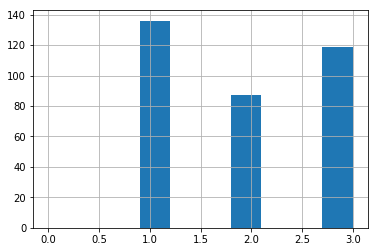

In [59]:
x[x["Survived"] == 1]["Pclass"].hist(range = (0,3))



# From the Pclass histogram it is obvious that there was no advantages or disadvantages for the rich and the poor. Both had the
# same chances to survive. It was more important if you where a male or a female, and young or old.

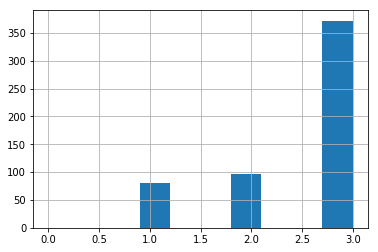

In [60]:
x[x["Survived"] == 0]["Pclass"].hist(range = (0,3))



# As for the non survivors, people from the 3rd class had more chances to die during the shipwreck than the people in 2nd and 1st

In [61]:
x[x.Age>65]


# From the list below we can see that the there was only 1 survivor over the age of 65. So if you were over 65 you would have 1/8
# chances of surviving

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [62]:
x[x.Age<18].count()


# 113 kids were the survivors from the shipwreck in total amount of 342. The chances for a kid to survive was almost 1/3.

PassengerId    113
Survived       113
Pclass         113
Name           113
Sex            113
Age            113
SibSp          113
Parch          113
Ticket         113
Fare           113
Cabin           19
Embarked       113
dtype: int64

In [63]:
x['FamilySize'] = x['SibSp'] + x['Parch'] + 1

In [64]:
x

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,2


In [65]:
x["FamilySize"][x["Survived"]==1][x["FamilySize"] >1].count()


# From the survivor number (179/342) it is clear that if you were travelling with 
# many family members didn't have any effect on your possibilities of surviving.

179

In [66]:
x[x.SibSp>4]




# Here we can see that 2 differnt families with 5 and 8 children all died because probably the were from the 3 class. If they were 
# traveling class 1 they could probably have more survivng possibilities.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.90,NaN,S,8
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.90,NaN,S,8
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.55,NaN,S,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,29.699118,8,2,CA. 2343,69.55,NaN,S,11
201,202,0,3,"Sage, Mr. Frederick",male,29.699118,8,2,CA. 2343,69.55,NaN,S,11
324,325,0,3,"Sage, Mr. George John Jr",male,29.699118,8,2,CA. 2343,69.55,NaN,S,11
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.000000,5,2,CA 2144,46.90,NaN,S,8
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.000000,5,2,CA 2144,46.90,NaN,S,8
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.000000,5,2,CA 2144,46.90,NaN,S,8
792,793,0,3,"Sage, Miss. Stella Anna",female,29.699118,8,2,CA. 2343,69.55,NaN,S,11
